In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Gemini_ETHUSD_1h.csv', index_col="date", skiprows=1)
dataset.head()

,unix,symbol,open,high,low,close,Volume ETH,Volume USD
date,,,,,,,,
2024-02-15 23:00:00,1708038000000,ETH/USD,2817.04,2828.72,2813.13,2822.82,251.699911,7.105035e+05
2024-02-15 22:00:00,1708034400000,ETH/USD,2796.39,2824.99,2795.30,2817.04,34.417424,9.695526e+04
2024-02-15 21:00:00,1708030800000,ETH/USD,2829.87,2848.08,2790.97,2796.39,355.426897,9.939122e+05
2024-02-15 20:00:00,1708027200000,ETH/USD,2838.79,2843.62,2817.50,2829.87,603.795629,1.708663e+06
2024-02-15 19:00:00,1708023600000,ETH/USD,2823.38,2841.42,2812.77,2838.79,605.331961,1.718410e+06


In [3]:
dataset = dataset.iloc[::-1]
dataset.head()

,unix,symbol,open,high,low,close,Volume ETH,Volume USD
date,,,,,,,,
2016-05-09 13:00:00,1462798800,ETH/USD,0.00,12.00,0.00,9.55,432.562115,4130.968200
2016-05-09 14:00:00,1462802400,ETH/USD,9.55,10.00,9.55,10.00,235.774075,2357.740748
2016-05-09 15:00:00,1462806000,ETH/USD,10.00,10.00,9.99,9.99,10.973567,109.625935
2016-05-09 16:00:00,1462809600,ETH/USD,9.99,9.99,9.79,9.83,62.379450,613.189994
2016-05-09 17:00:00,1462813200,ETH/USD,9.83,9.83,9.48,9.49,329.553213,3127.459991


In [4]:
df = dataset.reset_index()
df

,date,unix,symbol,open,high,low,close,Volume ETH,Volume USD
0,2016-05-09 13:00:00,1462798800,ETH/USD,0.00,12.00,0.00,9.55,432.562115,4.130968e+03
1,2016-05-09 14:00:00,1462802400,ETH/USD,9.55,10.00,9.55,10.00,235.774075,2.357741e+03
2,2016-05-09 15:00:00,1462806000,ETH/USD,10.00,10.00,9.99,9.99,10.973567,1.096259e+02
3,2016-05-09 16:00:00,1462809600,ETH/USD,9.99,9.99,9.79,9.83,62.379450,6.131900e+02
4,2016-05-09 17:00:00,1462813200,ETH/USD,9.83,9.83,9.48,9.49,329.553213,3.127460e+03
...,...,...,...,...,...,...,...,...,...
68115,2024-02-15 19:00:00,1708023600000,ETH/USD,2823.38,2841.42,2812.77,2838.79,605.331961,1.718410e+06
68116,2024-02-15 20:00:00,1708027200000,ETH/USD,2838.79,2843.62,2817.50,2829.87,603.795629,1.708663e+06
68117,2024-02-15 21:00:00,1708030800000,ETH/USD,2829.87,2848.08,2790.97,2796.39,355.426897,9.939122e+05
68118,2024-02-15 22:00:00,1708034400000,ETH/USD,2796.39,2824.99,2795.30,2817.04,34.417424,9.695526e+04


In [5]:
df = df[["open", "high", "low", "close","Volume ETH"]]
df.head()

,open,high,low,close,Volume ETH
0,0.00,12.00,0.00,9.55,432.562115
1,9.55,10.00,9.55,10.00,235.774075
2,10.00,10.00,9.99,9.99,10.973567
3,9.99,9.99,9.79,9.83,62.379450
4,9.83,9.83,9.48,9.49,329.553213


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


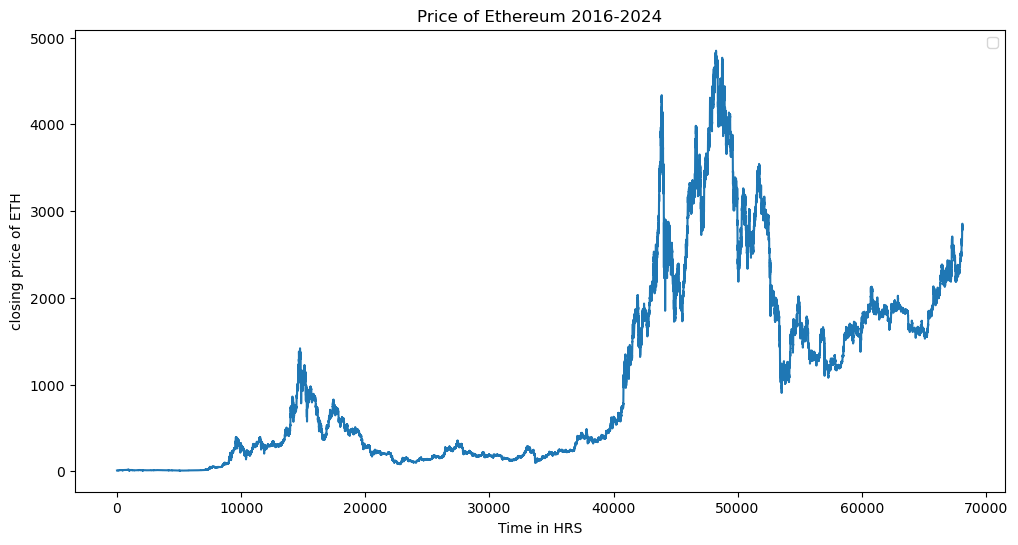

In [6]:

plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y='close', data=df).set_title("Price of Ethereum 2016-2024")
plt.xlabel('Time in HRS')
plt.ylabel('closing price of ETH')
plt.legend(loc='best');

In [7]:
SEQ_LEN = 120
FUTURE_PERIOD = 10

RATIO_TO_PREDICT = "close"

In [8]:
times = sorted(df.index.values)  # get the times
last_10 = sorted(df.index.values)[-int(0.1*len(times))] 
last_20 = sorted(df.index.values)[-int(0.2*len(times))]

test_df = df[(df.index >= last_10)]
validation_df = df[(df.index >= last_20) & (df.index < last_10)]  
train_df = df[(df.index < last_20)] 

In [9]:
train_ = train_df.values
valid_ = validation_df.values
test_ = test_df.values

In [10]:
print("train shape {0}".format(train_.shape))
print("valid shape {0}".format(valid_.shape))
print("test shape {0}".format(test_.shape))

train shape (54496, 5)
valid shape (6812, 5)
test shape (6812, 5)


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_close = MinMaxScaler()

In [12]:
x = train_[:,3].copy()
scale_close.fit(x.reshape(-1, 1))

MinMaxScaler()

In [13]:
scaler.fit(train_)

train_ = scaler.transform(train_)

valid_ = scaler.transform(valid_)
test_ = scaler.transform(test_)

In [14]:
train_.shape[0]

54496

In [15]:
#Exponential moving average smoothing for smooth curve of data
EMA = 0.0
gamma = 0.165
for ti in range(train_.shape[0]):
    EMA = gamma*train_[ti] + (1-gamma)*EMA
    train_[ti] = EMA

# for visualization and test purpose
all_mid_data = np.concatenate([train_,valid_, test_],axis=0)

Splitting data

In [16]:
def split_data(data):
    X = []
    Y = []
    for i in range(SEQ_LEN, len(data)-FUTURE_PERIOD+1):
        X.append(data[i-SEQ_LEN:i])
        Y.append(data[i+(FUTURE_PERIOD-1), 3])
    return np.array(X), np.array(Y)

In [17]:
X_train, y_train = split_data(train_)
X_test, y_test = split_data(test_)
X_valid, y_valid = split_data(valid_)

In [18]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 5))
X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 5))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 5))

In [19]:
y_train.shape

(54367,)

In [20]:
print("train shape {0}".format(X_train.shape))
print("valid shape {0}".format(X_valid.shape))
print("test shape {0}".format(X_test.shape))

train shape (54367, 120, 5)
valid shape (6683, 120, 5)
test shape (6683, 120, 5)


In [21]:
X_train_2, y_train_2 = split_data(train_)
X_train_2 = np.reshape(X_train_2, (X_train_2.shape[0], X_train_2.shape[1], 5))

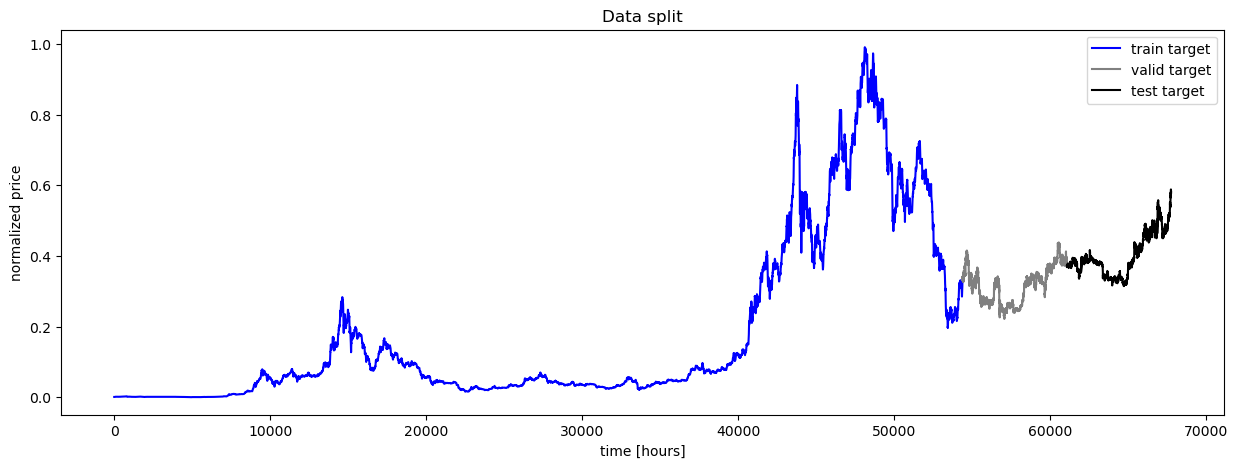

In [22]:
plt.figure(figsize=(15, 5))

plt.plot(np.arange(y_train_2.shape[0]), y_train_2, color='blue', label='train target')

plt.plot(np.arange(y_train_2.shape[0], y_train_2.shape[0]+y_valid.shape[0]), y_valid,
         color='gray', label='valid target')

plt.plot(np.arange(y_train_2.shape[0]+y_valid.shape[0],
                   y_train_2.shape[0]+y_valid.shape[0]+y_test.shape[0]),
         y_test, color='black', label='test target')


plt.title('Data split')
plt.xlabel('time [hours]')
plt.ylabel('normalized price')
plt.legend(loc='best');

Bi-LSTM MODEL

In [23]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, LSTM, LeakyReLU, Dropout, BatchNormalization
from keras.layers import Bidirectional

num_units = 128
activation_function = 'relu'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 128
num_epochs = 10

# Initialize RNN
regressor2 = Sequential()

# Adding the input layer and the LSTM layer
regressor2.add(Bidirectional(LSTM(units = num_units, input_shape=(120, 5))))
regressor2.add(LeakyReLU(alpha= 0.5))
regressor2.add(BatchNormalization())
regressor2.add(Dropout(0.5))
# Adding the output layer
regressor2.add(Dense(units = 1))


In [24]:
# Compiling RNN
regressor2.compile(optimizer = optimizer, loss = loss_function, metrics = ('MAPE'))

# Using the training set to train the model
history_BiLSTM2 = regressor2.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size = batch_size, epochs = num_epochs)

Epoch 1/10
425/425 [==============================] - 162s 365ms/step - loss: 0.0350 - MAPE: 1219.6553 - val_loss: 0.0097 - val_MAPE: 27.5551
Epoch 2/10
425/425 [==============================] - 141s 331ms/step - loss: 0.0017 - MAPE: 385.7629 - val_loss: 6.1421e-04 - val_MAPE: 6.8176
Epoch 3/10
425/425 [==============================] - 140s 329ms/step - loss: 0.0017 - MAPE: 399.3005 - val_loss: 3.9282e-04 - val_MAPE: 5.8610
Epoch 4/10
425/425 [==============================] - 160s 377ms/step - loss: 0.0014 - MAPE: 355.9783 - val_loss: 1.0383e-04 - val_MAPE: 2.3794
Epoch 5/10
425/425 [==============================] - 154s 363ms/step - loss: 0.0015 - MAPE: 390.4652 - val_loss: 2.0970e-04 - val_MAPE: 3.9318
Epoch 6/10
425/425 [==============================] - 185s 435ms/step - loss: 0.0014 - MAPE: 362.8790 - val_loss: 3.0471e-04 - val_MAPE: 4.7846
Epoch 7/10
425/425 [==============================] - 193s 454ms/step - loss: 0.0014 - MAPE: 362.2555 - val_loss: 2.2876e-04 - val_MAPE: 4

In [25]:
regressor2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 256)               137216    
 al)                                                             
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 138497 (541.00 KB)
Trainable params: 13798

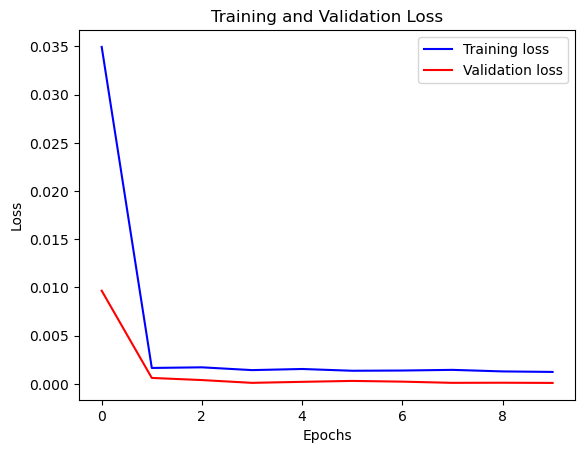

In [26]:
loss_BiLSTM2 = history_BiLSTM2.history['loss']
val_loss_BiLSTM2 = history_BiLSTM2.history['val_loss']

epochs = range(len(loss_BiLSTM2))

plt.figure()

plt.plot(epochs, loss_BiLSTM2, 'b', label='Training loss')
plt.plot(epochs, val_loss_BiLSTM2, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

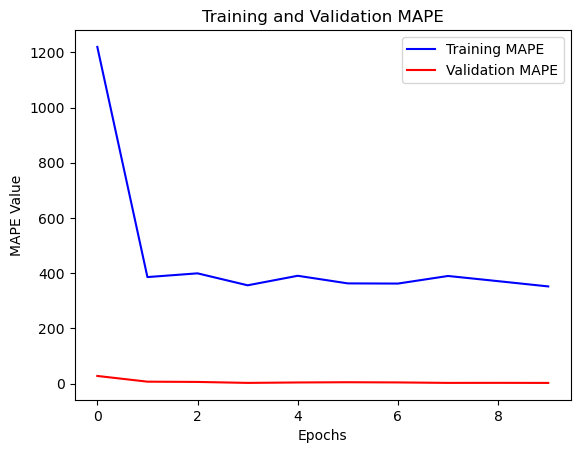

In [27]:
mape = history_BiLSTM2.history['MAPE']
val_mape = history_BiLSTM2.history['val_MAPE']

epochs = range(len(mape))

plt.figure()

plt.plot(epochs, mape, 'b', label='Training MAPE')
plt.plot(epochs, val_mape, 'r', label='Validation MAPE')
plt.title("Training and Validation MAPE")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MAPE Value')
plt.show()

In [28]:
pred_BiLSTM2 = regressor2.predict(X_test)

209/209 [==============================] - 8s 33ms/step


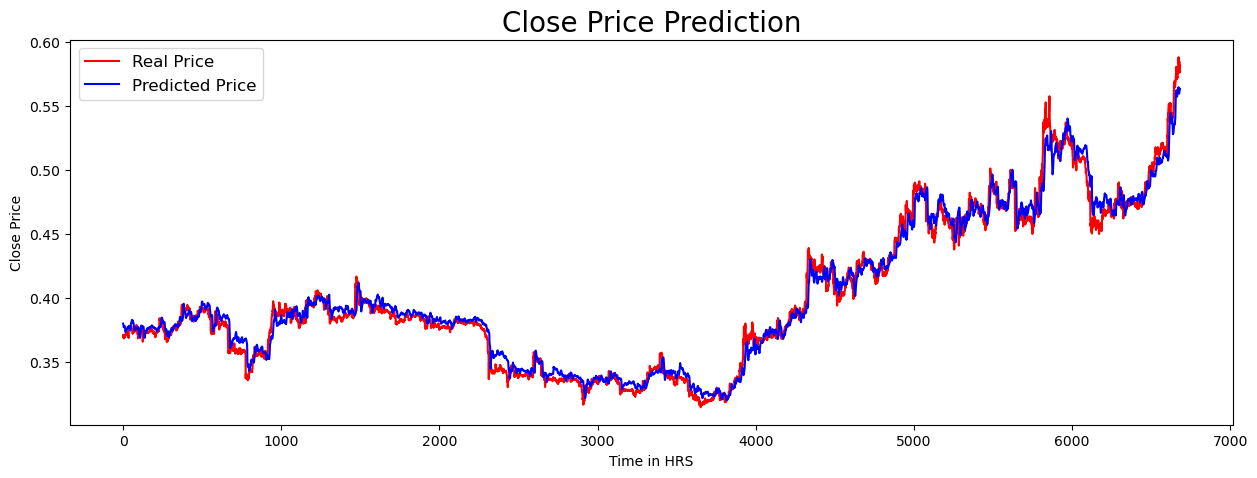

In [29]:
plt.figure(figsize=(15, 5))
plt.plot(y_test, color = 'red', label = 'Real Price')
plt.plot(pred_BiLSTM2, color = 'blue', label = 'Predicted Price')
plt.title('Close Price Prediction', fontsize=20)
plt.xlabel('Time in HRS')
plt.ylabel('Close Price')
plt.legend(fontsize=12)
plt.show()

In [30]:
import math

BiLSTM2_loss = regressor2.evaluate(X_test, y_test, verbose=1)
print('\nThe error of the model with 1 layer BiLSTM is:',BiLSTM2_loss)

209/209 [==============================] - 7s 33ms/step - loss: 7.1292e-05 - MAPE: 1.5085

The error of the model with 1 layer BiLSTM is: [7.129222649382427e-05, 1.5085177421569824]


LSTM MODEL

In [31]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, LSTM, LeakyReLU, Dropout, BatchNormalization

# Initialize the RNN
model_LSTM1 = Sequential()
model_LSTM1.add(LSTM(units = 128, input_shape=(120, 5)))
model_LSTM1.add(LeakyReLU(alpha=0.5))
model_LSTM1.add(Dropout(0.5))
model_LSTM1.add(BatchNormalization())
model_LSTM1.add(Dense(1))
model_LSTM1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               68608     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 69249 (270.50 KB)
Trainable params: 68993 (269.50 KB)
Non-trainable params: 256 (1.00 KB)
________________

In [32]:
model_LSTM1.compile(optimizer='adam', loss='mean_squared_error', metrics = ('MAPE'))

In [33]:
history_LSTM1 = model_LSTM1.fit(X_train, y_train,validation_data=(X_valid, y_valid), epochs=10, batch_size=128)

Epoch 1/10
425/425 [==============================] - 64s 145ms/step - loss: 0.0482 - MAPE: 1114.0282 - val_loss: 0.0135 - val_MAPE: 33.9137
Epoch 2/10
425/425 [==============================] - 63s 148ms/step - loss: 0.0019 - MAPE: 438.3900 - val_loss: 2.2604e-04 - val_MAPE: 3.8978
Epoch 3/10
425/425 [==============================] - 63s 149ms/step - loss: 0.0018 - MAPE: 411.2559 - val_loss: 1.0671e-04 - val_MAPE: 2.5731
Epoch 4/10
425/425 [==============================] - 64s 151ms/step - loss: 0.0017 - MAPE: 397.8954 - val_loss: 1.5453e-04 - val_MAPE: 3.5269
Epoch 5/10
425/425 [==============================] - 87s 205ms/step - loss: 0.0019 - MAPE: 439.1680 - val_loss: 5.7650e-05 - val_MAPE: 1.6938
Epoch 6/10
425/425 [==============================] - 70s 164ms/step - loss: 0.0018 - MAPE: 432.8828 - val_loss: 6.4769e-04 - val_MAPE: 7.6794
Epoch 7/10
425/425 [==============================] - 61s 143ms/step - loss: 0.0017 - MAPE: 406.5742 - val_loss: 3.3632e-04 - val_MAPE: 5.4923
E

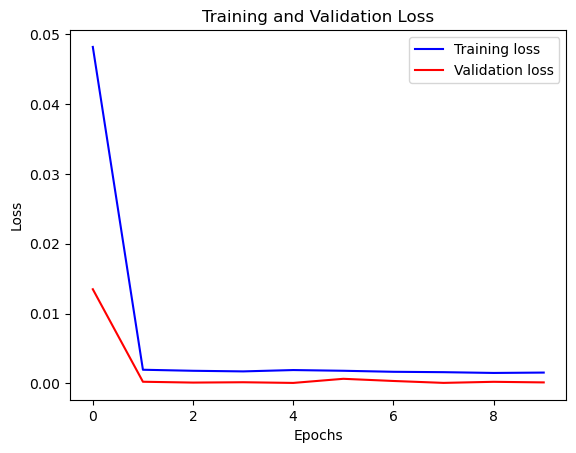

In [34]:
loss = history_LSTM1.history['loss']
val_loss = history_LSTM1.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

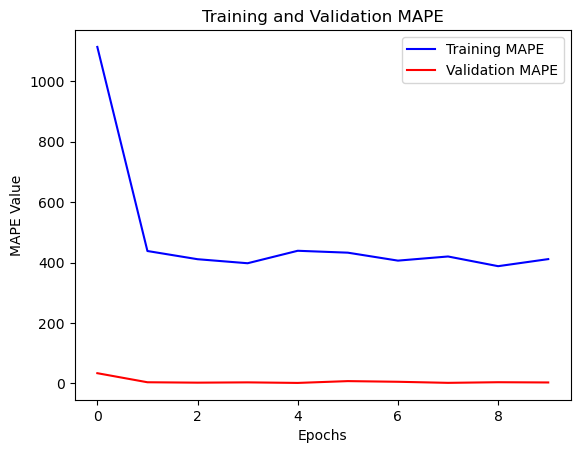

In [35]:
mape = history_LSTM1.history['MAPE']
val_mape = history_LSTM1.history['val_MAPE']

epochs = range(len(mape))

plt.figure()

plt.plot(epochs, mape, 'b', label='Training MAPE')
plt.plot(epochs, val_mape, 'r', label='Validation MAPE')
plt.title("Training and Validation MAPE")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MAPE Value')
plt.show()

In [36]:
pred_LSTM1 = model_LSTM1.predict(X_test)
pred_LSTM1.shape
y_valid.shape

209/209 [==============================] - 5s 24ms/step


(6683,)

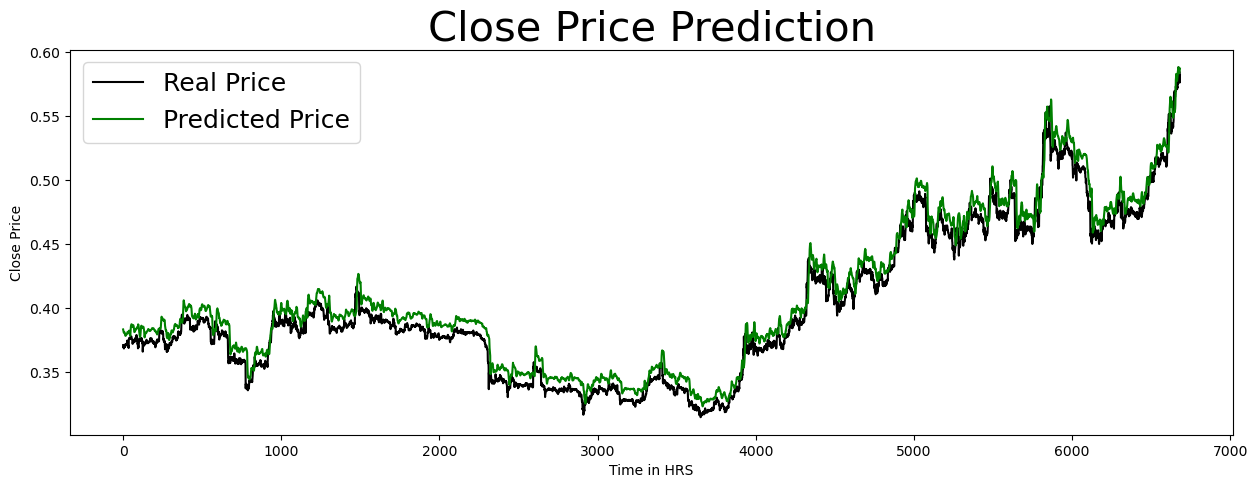

In [37]:
plt.figure(figsize=(15, 5))
plt.plot(y_test, color = 'black', label = 'Real Price')
plt.plot(pred_LSTM1, color = 'green', label = 'Predicted Price')
plt.title('Close Price Prediction', fontsize=30)
plt.xlabel('Time in HRS')
plt.ylabel('Close Price')
plt.legend(fontsize=18)
plt.show()

In [38]:
import math
LSTM1_loss = model_LSTM1.evaluate(X_test, y_test, verbose=1)
print('\nThe error of the model with 1 layer LSTM is:',LSTM1_loss)

209/209 [==============================] - 5s 25ms/step - loss: 1.2417e-04 - MAPE: 2.4965

The error of the model with 1 layer LSTM is: [0.00012417402467690408, 2.496452569961548]


GRU MODEL

In [26]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Reshape
from keras.layers import Conv1D, MaxPooling1D, LeakyReLU
from keras.layers import GRU
import tensorflow as tf
from keras.layers import Dense, LSTM, LeakyReLU, Dropout, BatchNormalization

model_GRU = Sequential()

model_GRU.add(GRU(units=128, input_shape=(120,5),return_sequences=False))
model_GRU.add(Activation('LeakyReLU'))
model_GRU.add(Dropout(0.55))
model_GRU.add(BatchNormalization())
model_GRU.add(Dense(1))
model_GRU.compile(loss='mse', optimizer='adam', metrics = ('MAPE'))
model_GRU.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 128)               51840     
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 52481 (205.00 KB)
Trainable params: 52225 (204.00 KB)
Non-trainable params: 256 (1.00 KB)
________________

In [27]:
history_GRU = model_GRU.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size = 128, epochs = 10)

Epoch 1/10
425/425 [==============================] - 53s 118ms/step - loss: 0.0293 - MAPE: 960.3260 - val_loss: 0.0104 - val_MAPE: 29.5596
Epoch 2/10
425/425 [==============================] - 50s 117ms/step - loss: 0.0023 - MAPE: 453.6043 - val_loss: 0.0016 - val_MAPE: 11.8832
Epoch 3/10
425/425 [==============================] - 50s 118ms/step - loss: 0.0022 - MAPE: 447.8639 - val_loss: 1.1552e-04 - val_MAPE: 2.8068
Epoch 4/10
425/425 [==============================] - 50s 119ms/step - loss: 0.0020 - MAPE: 444.1071 - val_loss: 2.7202e-04 - val_MAPE: 4.9619
Epoch 5/10
425/425 [==============================] - 51s 119ms/step - loss: 0.0020 - MAPE: 441.8686 - val_loss: 4.5502e-04 - val_MAPE: 6.6621
Epoch 6/10
425/425 [==============================] - 53s 125ms/step - loss: 0.0019 - MAPE: 443.1038 - val_loss: 7.8378e-05 - val_MAPE: 2.0684
Epoch 7/10
425/425 [==============================] - 52s 122ms/step - loss: 0.0017 - MAPE: 419.4170 - val_loss: 1.1990e-04 - val_MAPE: 2.5791
Epoch

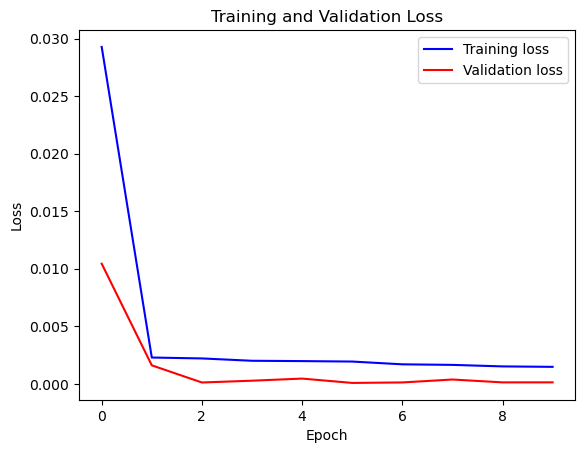

In [28]:
loss_GRU = history_GRU.history['loss']
val_loss_GRU = history_GRU.history['val_loss']

epochs = range(len(loss_GRU))

plt.figure()

plt.plot(epochs, loss_GRU, 'b', label='Training loss')
plt.plot(epochs, val_loss_GRU, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

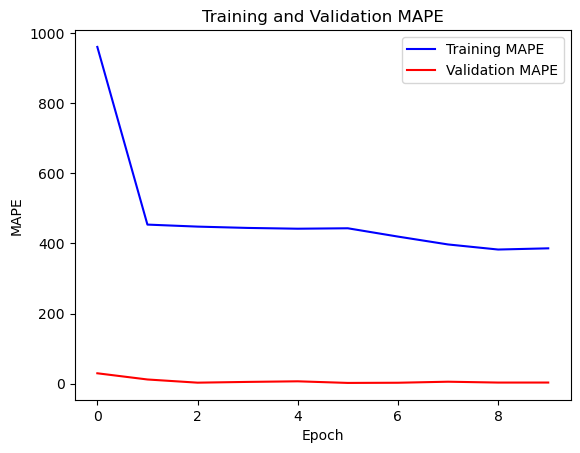

In [29]:
mape = history_GRU.history['MAPE']
val_mape = history_GRU.history['val_MAPE']

epochs = range(len(mape))

plt.figure()

plt.plot(epochs, mape, 'b', label='Training MAPE')
plt.plot(epochs, val_mape, 'r', label='Validation MAPE')
plt.title("Training and Validation MAPE")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MAPE')
plt.show()

In [30]:
pred_GRU = model_GRU.predict(X_test)

209/209 [==============================] - 5s 21ms/step


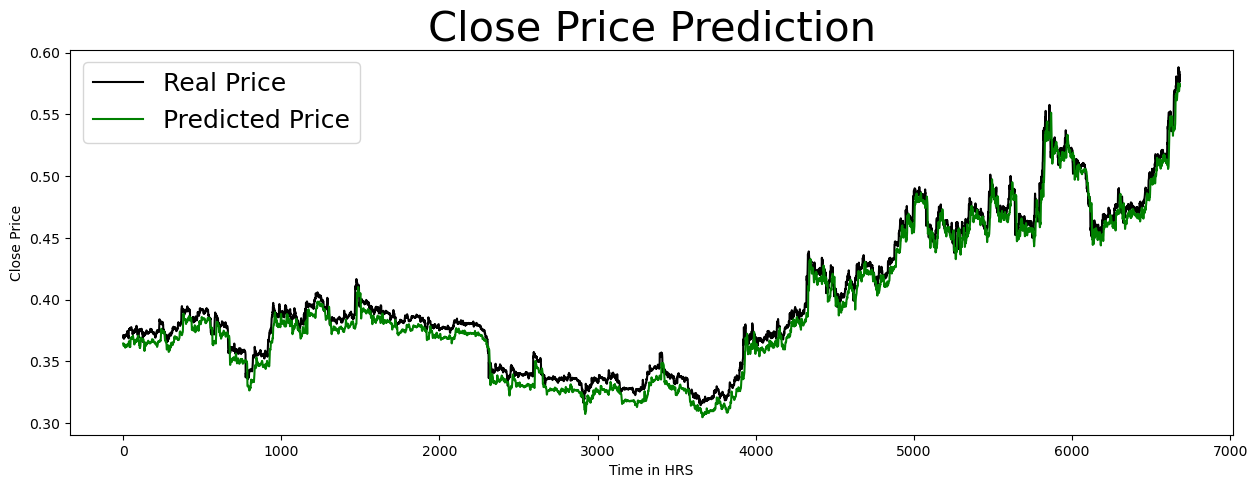

In [31]:
plt.figure(figsize=(15, 5))
plt.plot(y_test, color = 'black', label = 'Real Price')
plt.plot(pred_GRU, color = 'green', label = 'Predicted Price')
plt.title('Close Price Prediction', fontsize=30)
plt.xlabel('Time in HRS')
plt.ylabel('Close Price')

plt.legend(fontsize=18)
plt.show()

In [32]:
import math

GRU_loss = model_GRU.evaluate(X_test, y_test, verbose=1)
print('\nThe error of the model with a GRU layer is:',GRU_loss)

209/209 [==============================] - 4s 20ms/step - loss: 9.9622e-05 - MAPE: 2.1655

The error of the model with a GRU layer is: [9.962169133359566e-05, 2.165520191192627]
